# Community Segments

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import string
import random
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 

import community
import leidenalg
import igraph as ig

In [2]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

def compw(x,y):
    for edge in G0.edges(data=True):
        if edge[0]==x and edge[1]==y:
            return edge[2]['weight']
        elif edge[1]==x and edge[0]==y:
            return edge[2]['weight']

def disconts(A):
    #A is a sorted list of integers in increasing order
    m=len(A)
    t=[]
    for i in range(1,m):
        d=A[i]-A[i-1]
        if d>1:
            t.append(i)
    return t

def segl(A,t):
    r=[]
    if len(t)==0:
        r.append(A)
    else:
        for i in range(len(t)):
            r.append(A[0:t[0]])
            A=A[t[0]:]
            t=disconts(A)
            if len(t)==0:
                r.append(A)
    return r

## Robotic Data

In [3]:
# df = pd.read_csv("nodes_edges.csv", dtype='unicode')
df = pd.read_csv("/Volumes/2 TB Seagate Bac/Data_etc/nodes_edges.csv", dtype={'Node1': np.int64, 'Node2': np.int64,'Weight':np.int64})
print "Number of rows =", len(df)
df.head(3)

Number of rows = 419986


,Node1,Node2,Weight
0,0,1,425
1,0,2,385
2,0,3,364


In [4]:
# import time
# start = time.clock()

# eds=[]
# for i in range(len(df)):
#     a=df.iloc[i]["Node1"]
#     b=df.iloc[i]["Node2"]
#     c=df.iloc[i]["Weight"]
#     eds.append((int(a),int(b),int(c)))
# print len(eds)

# G = nx.Graph()
# G.add_weighted_edges_from(eds)
# G.remove_edges_from([e for e in G.edges(data=True) if e[2]['weight']==0])

# n=len(G.nodes())
# m=len(G.edges())
# print "The graph of robotic data has %i nodes and %i edges" %(n,m) 
# if n*(n-1)/2.==float(m):
#     print "This graph is complete"
# else:
#     print "This graph is not complete"
#     if nx.is_connected(G)==True:
#         print "This graph is connected"
#     else:
#         print "This is not connected and the number of connected components =", nx.number_connected_components(G)

# nx.write_gpickle(G, "robot.gpickle")
        
# print "computed in",time.clock() - start #4.62 mins

In [5]:
G0 = nx.read_gpickle("robot.gpickle")

gedges=G0.edges(data=True)
n=len(G0.nodes())
m=len(G0.edges())
giant = max(nx.connected_component_subgraphs(G0), key=len)
print "The graph of robotic data has %i nodes and %i edges" %(n,m) 
if n*(n-1)/2.==float(m):
    print "This graph is complete"
else:
    print "This graph is not complete"
    if nx.is_connected(G0)==True:
        print "This graph is connected"
    else:
        print "This is not connected and the number of connected components =", nx.number_connected_components(G0)
        print "The giant conected component of this graph has %i nodes and %i edges" %(len(giant.nodes()),len(giant.edges()))

The graph of robotic data has 917 nodes and 409965 edges
This graph is not complete
This is not connected and the number of connected components = 12
The giant conected component of this graph has 906 nodes and 409965 edges


In [6]:
# giant = max(nx.connected_component_subgraphs(G), key=len)
# nx.write_gpickle(giant, "robotgiant.gpickle")
# giant = nx.read_gpickle("robotgiant.gpickle")
# print "Giant connected component", len(giant.nodes()),len(giant.edges())

## Louvain communities of robotic data

The graph has 20 Louvain communities and modularity coefficient equal to 0.00133023694135
Community 0 with 173 nodes: [57, 65, 66, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 495, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 576, 584, 585]
Community 1 with 12

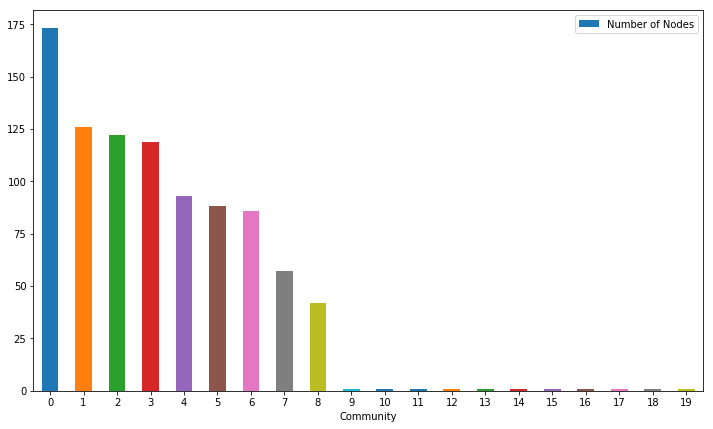

In [7]:
G=G0

partition = community.best_partition(G)

kk=len(set(partition.values()))

modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity
cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0);

### Segments of Louvain Communities

In [8]:
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for i in eocmd:
    A=list(i[1][0])
    t=disconts(A)
    s=segl(A,t)
    print 'Community', i[0], 'has the following',len(s), 'segments:'
    for i in range(len(s)):
        print 'segment %i: %s' %(i,s[i])
    print

Community 0 has the following 8 segments:
segment 0: [57]
segment 1: [65, 66]
segment 2: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202]
segment 3: [366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419]
segment 4: [495]
segment 5: [562, 563, 564, 565, 566, 567, 568, 569, 570, 571]
segment 6: [576]
segment 7: [584, 585]


In [9]:
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
print "The range of weights/similarities between consequtive frames in Louvain communities with more than two frames:"
print
for i in eocmd:
    A=list(i[1][0])
    t=disconts(A)
    s=segl(A,t)
    print "In Louvain community %i:" %i[0]
    if len(A)>1:
        for k in range(len(s)):
            if len(s[k])>1:
                SL=[]
                if len(s[k])%2!=0:
                    for j in range(len(s[k])-1):
                        W=compw(s[k][j],s[k][j+1])
                        SL.append(W) #
                else:
                    for j in range(1,len(s[k])):
                        W=compw(s[k][j-1],s[k][j])
                        SL.append(W) #
                print "segment %i varies from %i to %i (range width = %i)" %(k,min(SL),max(SL),max(SL)-min(SL)) 
    print

The range of weights/similarities between consequtive frames in Louvain communities with more than two frames:

In Louvain community 0:
segment 1 varies from 415 to 415 (range width = 0)
segment 2 varies from 313 to 435 (range width = 122)
segment 3 varies from 325 to 406 (range width = 81)
segment 5 varies from 327 to 410 (range width = 83)
segment 7 varies from 323 to 323 (range width = 0)

In Louvain community 1:
segment 1 varies from 323 to 359 (range width = 36)
segment 2 varies from 293 to 414 (range width = 121)
segment 4 varies from 327 to 515 (range width = 188)

In Louvain community 2:
segment 2 varies from 356 to 473 (range width = 117)

In Louvain community 3:
segment 0 varies from 331 to 480 (range width = 149)
segment 1 varies from 334 to 442 (range width = 108)
segment 2 varies from 341 to 497 (range width = 156)

In Louvain community 4:
segment 0 varies from 345 to 467 (range width = 122)
segment 1 varies from 352 to 439 (range width = 87)
segment 2 varies from 322 to 4

## Leiden communities of robotic data

The graph has 21 Louvain communities and modularity coefficient equal to 0.00136664710882

Leiden community 0 with 276 nodes:
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 4

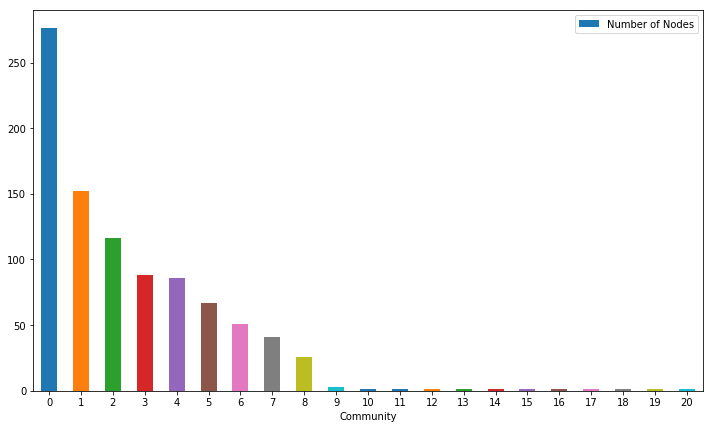

In [10]:
G=G0

g = ig.Graph(directed=False)

nodelist = list(G.nodes())
nodelist.sort()
g.add_vertices(G.nodes())
g.add_edges(G.edges())
g.es["weight"]=[e[2]['weight'] for e in G.edges(data=True)]

# mapping = {old_label:new_label for new_label, old_label in enumerate(G.nodes())}
# H = nx.relabel_nodes(G, mapping)
# g.add_vertices(H.nodes())
# g.add_edges(H.edges())

# partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition);
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition, weights='weight');

# mpart=[]
# for i in list(partition):
#     t=[]
#     for j in i:
#         for k,v in mapping.items():
#             if v==j:
#                 t.append(k)
#     mpart.append(t)


kk=len(list(partition))

cml=list(partition)
partd={}
for i,j in list(enumerate(cml)):
    for jj in j:
        partd[jj]=i
modularity=community.modularity(partd, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity
print

# cml=mpart

cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
leiden_comm_membership={}
for i in eocmd:
    print 'Leiden community', i[0], 'with', i[1][1], 'nodes:' 
    print list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    leiden_comm_membership[i[0]]=ts
    print

ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0);

### Segments of Leiden Communities

In [11]:
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for i in eocmd:
    A=list(i[1][0])
    t=disconts(A)
    s=segl(A,t)
    print 'Leiden community', i[0], 'has the following',len(s), 'segments:'
    for i in range(len(s)):
        print 'segment %i: %s' %(i,s[i])
    print

Leiden community 0 has the following 13 segments:
segment 0: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
segment 1: [65, 66, 67, 68]
segment 2: [204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288]
segment 3: [315, 316, 317, 318, 319, 320, 321, 322, 323, 324]
segment 4: [352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365]
segment 5: [423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 4

In [12]:
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
print "The range of weights/similarities between consequtive frames in Leiden communities with more than two frames:"
print
for i in eocmd:
    A=list(i[1][0])
    t=disconts(A)
    s=segl(A,t)
    print "In Leiden community %i:" %i[0]
    if len(A)>1:
        for k in range(len(s)):
            if len(s[k])>1:
                SL=[]
                if len(s[k])%2!=0:
                    for j in range(len(s[k])-1):
                        W=compw(s[k][j],s[k][j+1])
                        SL.append(W) #
                else:
                    for j in range(1,len(s[k])):
                        W=compw(s[k][j-1],s[k][j])
                        SL.append(W) #
                print "segment %i varies from %i to %i (range width = %i)" %(k,min(SL),max(SL),max(SL)-min(SL)) 
    print

The range of weights/similarities between consequtive frames in Leiden communities with more than two frames:

In Leiden community 0:
segment 0 varies from 293 to 515 (range width = 222)
segment 1 varies from 293 to 415 (range width = 122)
segment 2 varies from 315 to 480 (range width = 165)
segment 3 varies from 346 to 502 (range width = 156)
segment 4 varies from 293 to 493 (range width = 200)
segment 5 varies from 323 to 497 (range width = 174)
segment 6 varies from 342 to 460 (range width = 118)
segment 7 varies from 440 to 440 (range width = 0)
segment 8 varies from 403 to 403 (range width = 0)
segment 9 varies from 293 to 414 (range width = 121)
segment 10 varies from 304 to 407 (range width = 103)
segment 11 varies from 340 to 435 (range width = 95)
segment 12 varies from 313 to 516 (range width = 203)

In Leiden community 1:
segment 0 varies from 313 to 434 (range width = 121)
segment 1 varies from 325 to 406 (range width = 81)
segment 3 varies from 327 to 410 (range width = 83